출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


C:\Users\lh\AppData\Local\Temp\ipykernel_12336\745757850.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hacha.drop(0, inplace=True)
C:\Users\lh\AppData\Local\Temp\ipykernel_12336\745757850.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hacha.rename(columns={'Unnamed: 11':'07:00~07:59', 'Unnamed: 13':'08:00~08:59'}, inplace=True)


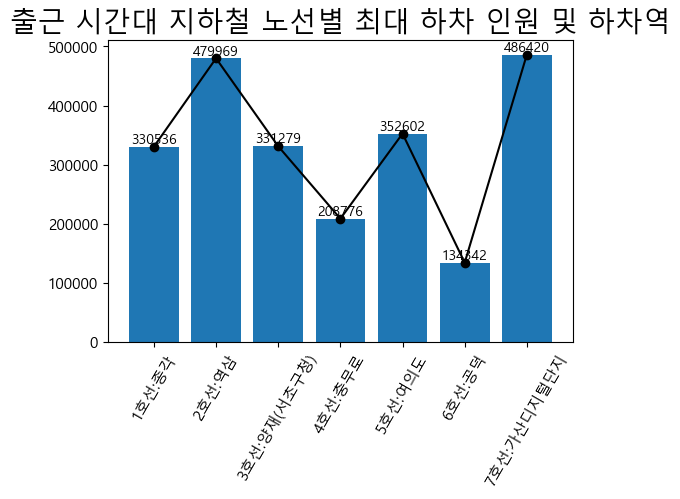

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform


subway_data = pd.read_csv('seoul_subway_time.csv', thousands=',', )


# 필요 데이터 구간만 분리 후 생성
hacha = subway_data.iloc[:, [1, 3, 11, 13]]
hacha.drop(0, inplace=True)
hacha.rename(columns={'Unnamed: 11':'07:00~07:59', 'Unnamed: 13':'08:00~08:59'}, inplace=True)


# 일부 데이터 타입 변환 및 최대 하차인원 데이터 컬럼 추가
total = hacha.iloc[:, 2:].astype('int64')
total = total.iloc[:, 0] + total.iloc[:, 1]
hacha.insert(hacha.shape[1], '7~8', total)


# lines = 분석할 호선, hacha_max = 최대 하차인원 리스트, max_station = 최대 하차역
lines = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선']
line_group = hacha.groupby('호선명')
hacha_max = [line_group.get_group(line)['7~8'].max() for line in lines]
max_station = []
for max in hacha_max:
	idx = hacha['지하철역'][hacha['7~8']==max].index[0]
	max_station.append(hacha.iloc[(idx-1), 1])


# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
	font_name = fm.FontProperties(fname='../font/malgun.ttf').get_name()
	plt.rc('font', family=font_name, size=11)
else:
	plt.rc('font', family='AppleGothic', size=8)


# 실행 결과문 출력
for line, station, max in zip(lines, max_station, hacha_max):
	print(f'출근 시간대 {line} 최대 하차역은 {station}역이고 하차인원은 {max:,}명 입니다.')



# 데이터 시각화
plt.figure(dpi=100)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역', fontsize=20)
xlabels = [line+':'+station for line, station in zip(lines, max_station)]
plt.bar(xlabels, hacha_max)
plt.xticks(rotation=60)
# 선 그래프 추가
plt.plot(hacha_max, marker='o', color='k')
# 그래프에 값 표시
for x, y in zip(np.arange(7), hacha_max):
	plt.text(x, y, y,\
		fontsize=10,\
			color='k',\
				horizontalalignment='center',\
					verticalalignment='bottom')
plt.show()
